In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [3]:
dataset = pd.read_csv('Alquiler_Residencial.csv', sep = ';')
dataset.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
4,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
6,Casa en condominio,Ate,5,4,5,750,22000.0,NaN,NaN
7,Casa en condominio,El Agustino,2,2,0,65,1000.0,NaN,NaN
8,Departamento,Pachacámac,1,0,0,36,1200.0,NaN,NaN
9,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0


## BOX PLOT
Diagrama estaístico que nos permite visualizar datos del banco.

<Axes: >

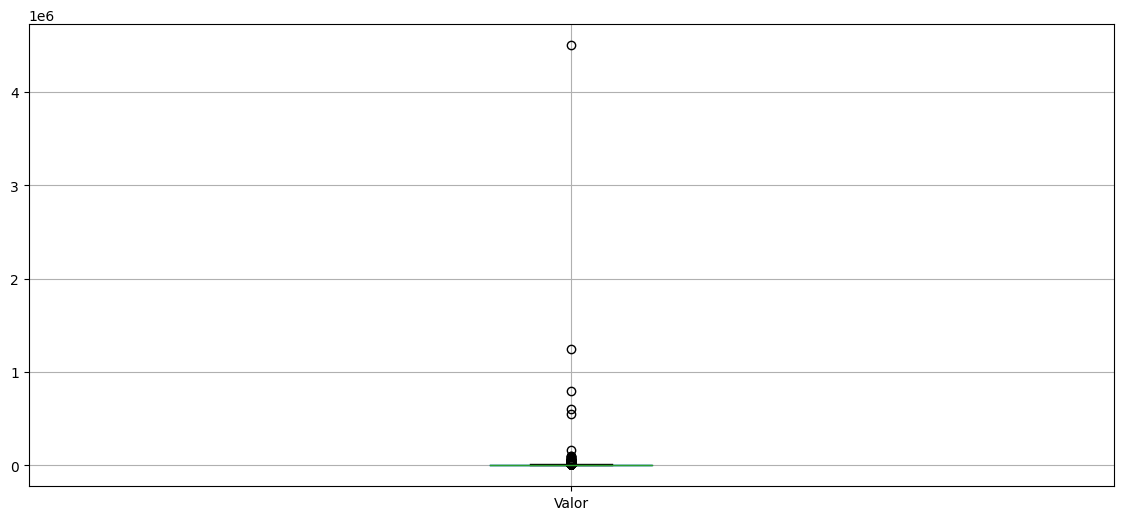

In [4]:
dataset.boxplot(['Valor'])

In [5]:
dataset[dataset['Valor'] >= 500000] # Se deben eliminar los Outliers

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
7996,Departamento,Ate,1,1,0,65,600000.0,980.0,120.0
11151,Casa en condominio,Callao,4,2,3,163,800000.0,900.0,NaN
13260,Departamento,Callao,2,2,1,150,550000.0,850.0,150.0
14502,Departamento,Jesús María,3,2,1,167,1250000.0,1186.0,320.0
16251,Departamento,Chorrillos,4,1,1,300,4500000.0,1100.0,NaN


## Indicadores


In [6]:
valor = dataset['Valor']

In [8]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [9]:
seleccion = (valor >= limite_inferior) & ( valor <= limite_superior)

In [10]:
nueva_dataset = dataset[seleccion]

<Axes: >

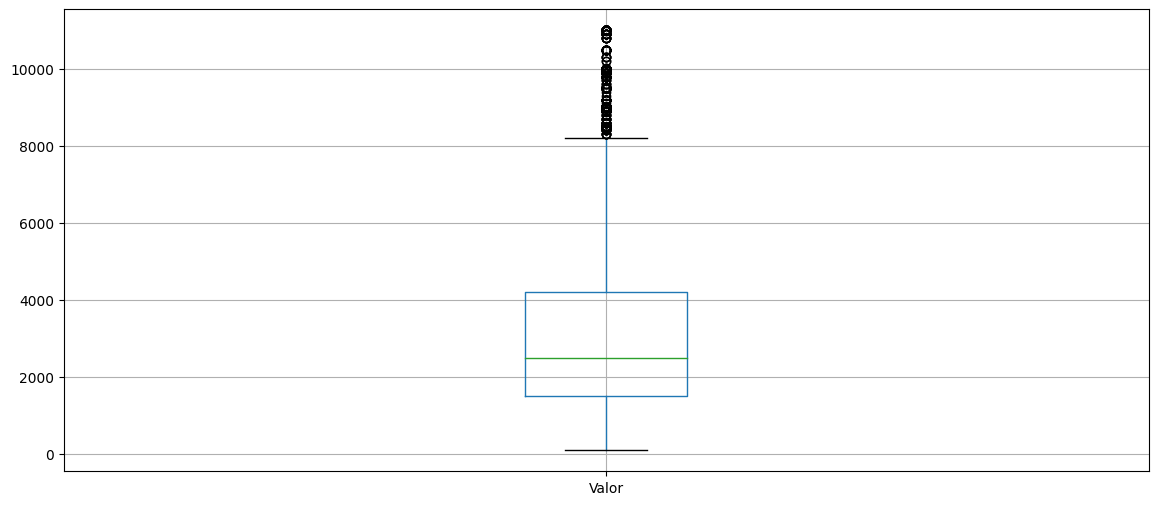

In [11]:
nueva_dataset.boxplot(['Valor'])

## Histograma
Gráficos de barras para visualizar la distribución de frecuencia

### Histograma con la dataset original

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

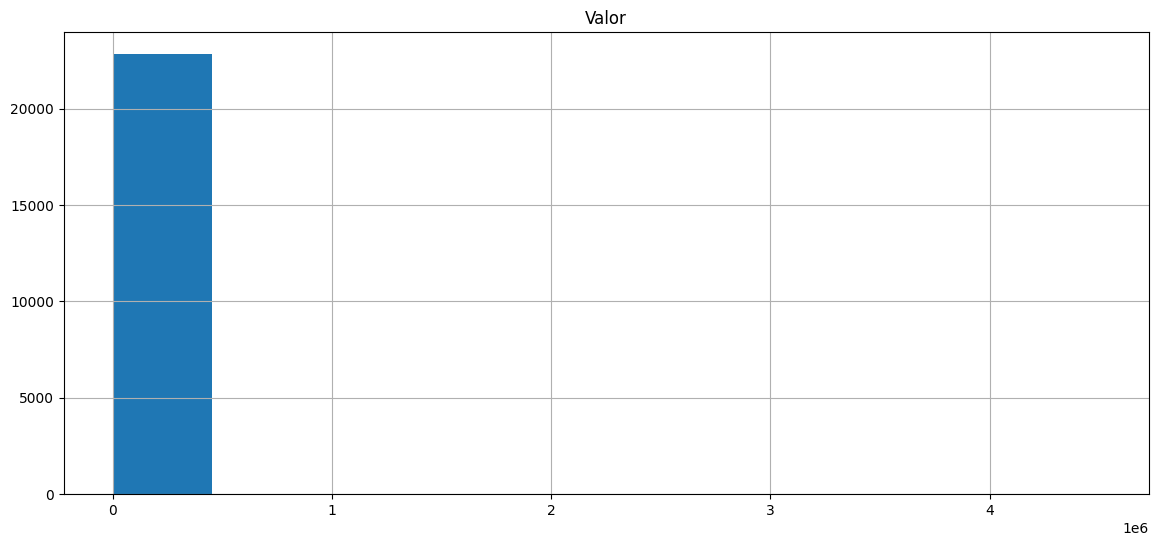

In [12]:
dataset.hist(['Valor'])

### Histograma con la dataset nueva

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

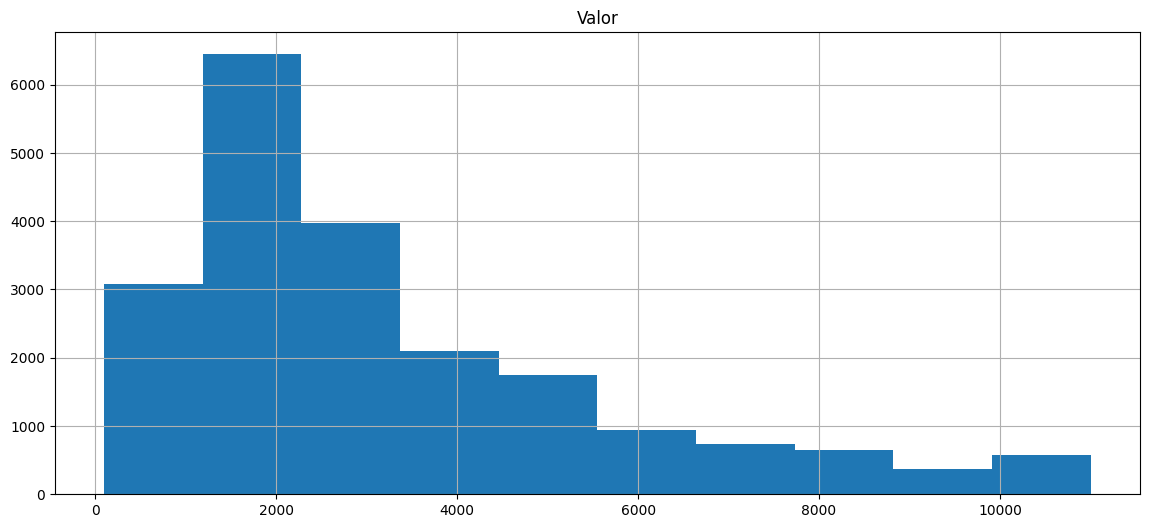

In [13]:
nueva_dataset.hist(['Valor'])

##  Identificando y Excluyendo Outliers por Grupo

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

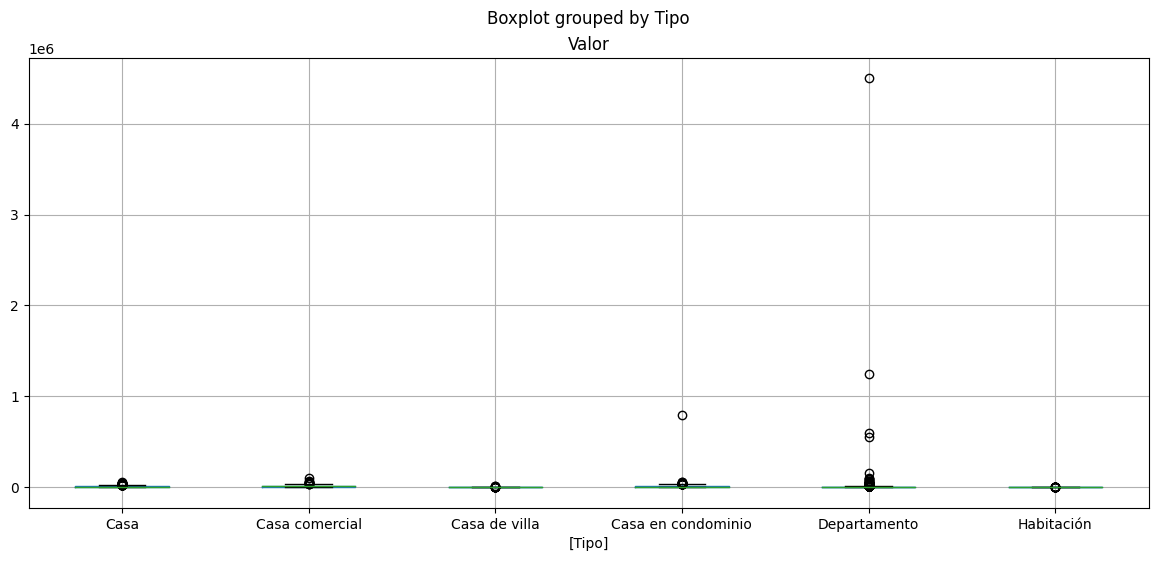

In [14]:
dataset.boxplot(['Valor'], by = ['Tipo'])

In [17]:
grupo_tipo = dataset.groupby('Tipo')['Valor']

In [18]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [19]:
grupo_tipo.groups

{'Casa': [1, 24, 56, 60, 101, 105, 152, 168, 190, 251, 263, 266, 277, 300, 324, 330, 349, 354, 372, 393, 400, 414, 440, 450, 491, 492, 498, 532, 564, 565, 590, 595, 596, 644, 648, 657, 663, 664, 690, 707, 731, 752, 755, 792, 803, 814, 893, 910, 978, 1028, 1076, 1083, 1167, 1172, 1174, 1207, 1229, 1303, 1310, 1374, 1393, 1408, 1429, 1473, 1487, 1491, 1503, 1508, 1536, 1539, 1553, 1655, 1674, 1708, 1730, 1736, 1740, 1746, 1759, 1785, 1793, 1840, 1891, 1916, 1956, 1987, 2015, 2024, 2044, 2109, 2129, 2146, 2166, 2192, 2198, 2199, 2226, 2266, 2298, 2301, ...], 'Casa comercial': [61, 144, 204, 338, 466, 504, 581, 594, 645, 668, 789, 805, 852, 935, 937, 939, 1000, 1091, 1240, 1354, 1439, 1462, 1497, 1563, 1578, 1845, 2032, 2262, 2596, 2625, 2645, 2695, 2703, 2746, 2774, 2916, 2994, 3072, 3230, 3242, 3256, 3348, 3426, 3484, 3486, 3497, 3506, 3725, 4006, 4060, 4124, 4171, 4182, 4658, 4742, 4942, 4972, 5032, 5113, 5140, 5171, 5232, 5256, 5291, 5445, 5502, 5506, 5507, 5576, 5606, 5738, 5863, 5940

In [20]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [21]:
Q1

Tipo
Casa                  1100.0
Casa comercial        6000.0
Casa de villa          750.0
Casa en condominio    4000.0
Departamento          1600.0
Habitación             900.0
Name: Valor, dtype: float64

In [24]:
Q3

Tipo
Casa                   9800.0
Casa comercial        18000.0
Casa de villa          1800.0
Casa en condominio    15250.0
Departamento           5000.0
Habitación             1500.0
Name: Valor, dtype: float64

In [22]:
limite_inferior

Tipo
Casa                 -11950.0
Casa comercial       -12000.0
Casa de villa          -825.0
Casa en condominio   -12875.0
Departamento          -3500.0
Habitación                0.0
Name: Valor, dtype: float64

In [23]:
limite_superior

Tipo
Casa                  22850.0
Casa comercial        36000.0
Casa de villa          3375.0
Casa en condominio    32125.0
Departamento          10100.0
Habitación             2400.0
Name: Valor, dtype: float64

In [25]:
nueva_dataset = pd.DataFrame()
# Granando los datos
for tipo in grupo_tipo.groups.keys():
  eh_tipo = dataset['Tipo'] == tipo
  eh_dentro_limite = (dataset['Valor'] >= limite_inferior[tipo]) & (dataset['Valor'] <= limite_superior[tipo])
  seleccion = eh_tipo & eh_dentro_limite
  datos_seleccion = dataset[seleccion]
  nueva_dataset = pd.concat([nueva_dataset, datos_seleccion])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

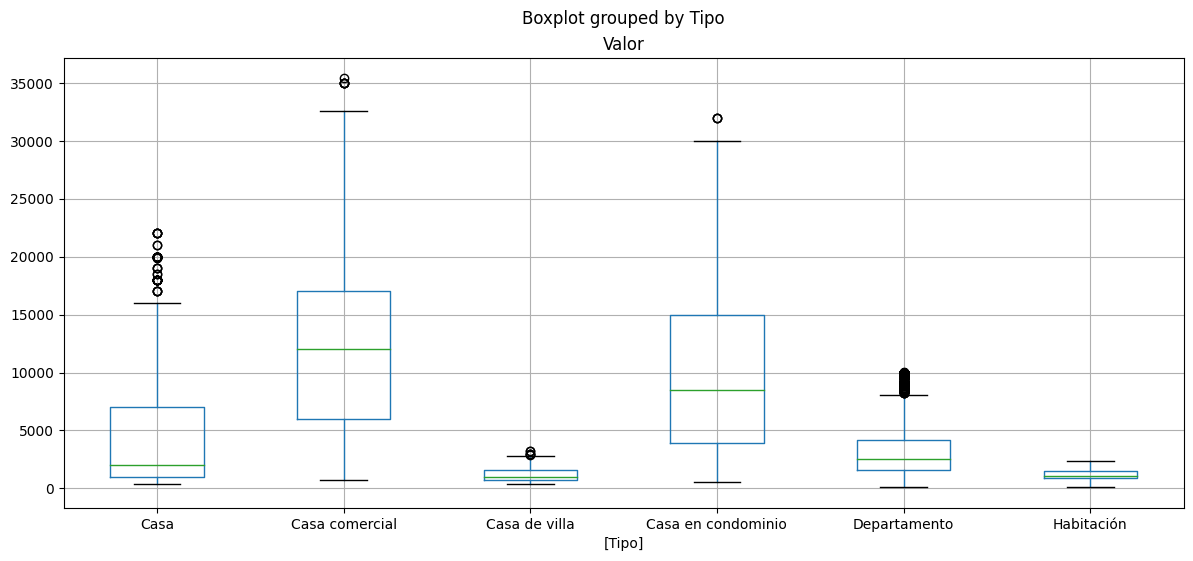

In [29]:
nueva_dataset.boxplot(['Valor'], by = ['Tipo'])

In [30]:
nueva_dataset.to_csv('alquiler_residencial_sin_outliners.csv', sep = ';', index = False)

# Gráficos

In [33]:
dataset2 = pd.read_csv('alquiler_residencial_sin_outliners.csv', sep = ';')
dataset2.head()

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
1,Casa,Lince,4,1,2,400,12000.0,NaN,NaN
2,Casa,Santa Anita,2,0,0,51,1500.0,50.0,NaN
3,Casa,San Luis,8,3,5,259,7000.0,NaN,NaN
4,Casa,Breña,1,0,0,33,1200.0,NaN,NaN


In [34]:
area = plt.figure()

<Figure size 1400x600 with 0 Axes>

In [36]:
g1 = area.add_subplot(2,2,1)
g2 = area.add_subplot(2,2,2)
g3 = area.add_subplot(2,2,3)
g4 = area.add_subplot(2,2,4)

In [38]:
# Crear Gráficos
g1.scatter(dataset2.Valor, dataset2.Area)
g1.set_title('Valor x Area')

g2.hist(dataset2.Valor)
g2.set_title('Histograma')

data_g3 = dataset2.Valor.sample(100) # Muestra aleatoria
data_g3.index = range(data_g3.shape[0]) # Corrigiendo index
g3.plot(data_g3)
g3.set_title('Muestra (Valor)')

grupo = dataset2.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor medio por tipo')

Text(0.5, 1.0, 'Valor medio por tipo')

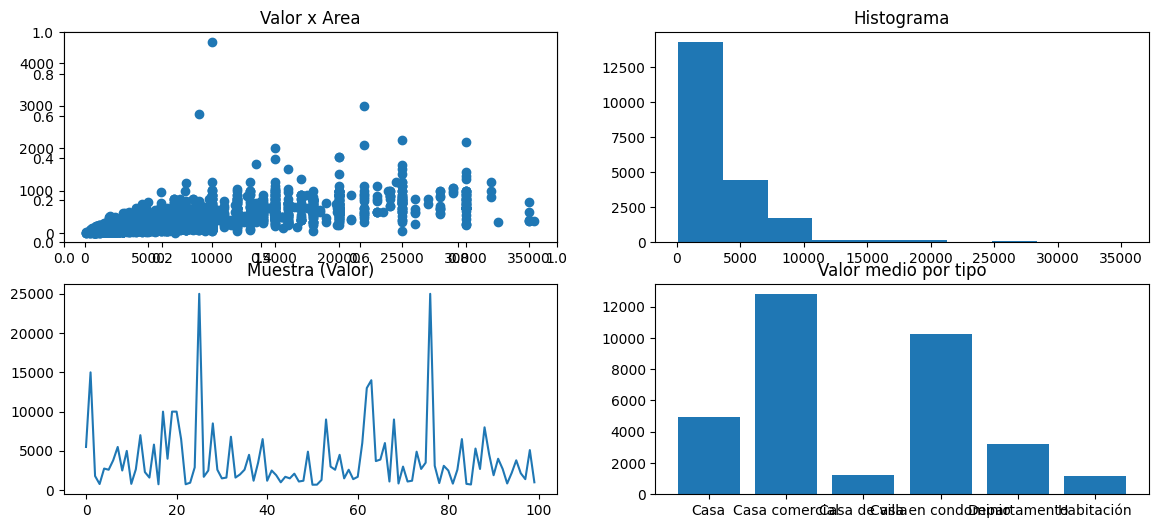

In [39]:
area

In [40]:
# Exportar gráficos
area.savefig('Grafico.png', dpi = 300, bbox_inches = 'tight')